In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/gender_submission.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(train_data.dtypes.astype(str).value_counts())

object     5
int64      5
float64    2
dtype: int64


In [6]:
train_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)
test_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)


In [7]:
train_data.select_dtypes(include=['object'])

Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]

In [8]:
train_data.select_dtypes(include=['int64'])

Survived  Pclass  SibSp  Parch
0           0       3      1      0
1           1       1      1      0
2           1       3      0      0
3           1       1      1      0
4           0       3      0      0
..        ...     ...    ...    ...
886         0       2      0      0
887         1       1      0      0
888         0       3      1      2
889         1       1      0      0
890         0       3      0      0

[891 rows x 4 columns]

In [ ]:
train_data.select_dtypes(include=['float64'])

Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]

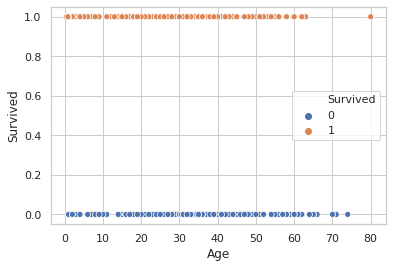

In [ ]:
sns.scatterplot(x='Age',y='Survived',data=train_data,hue='Survived')

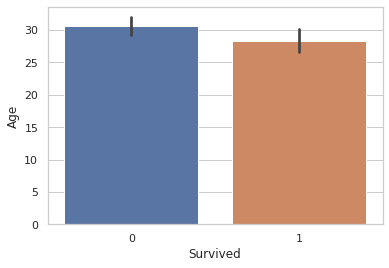

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Survived", y="Age", data=train_data)

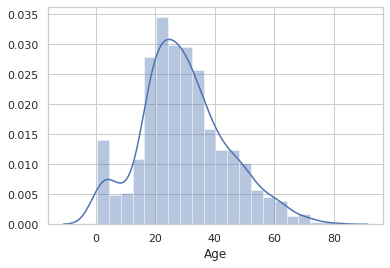

In [ ]:
ax = sns.distplot(train_data['Age'])

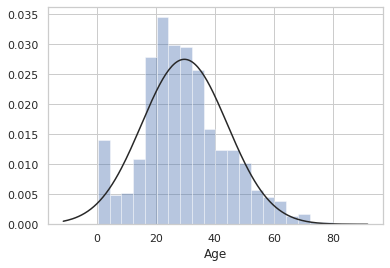

In [ ]:
ax = sns.distplot(train_data['Age'], fit=norm, kde=False)

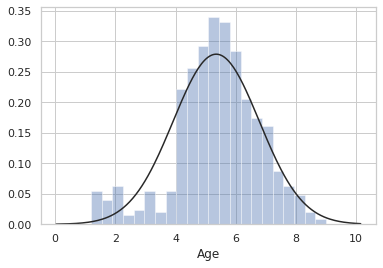

In [ ]:
ax = sns.distplot((train_data['Age']+1)**(1/2), fit=norm, kde=False)

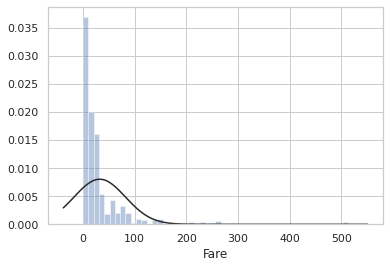

In [ ]:
ax = sns.distplot(train_data['Fare'], fit=norm, kde=False)

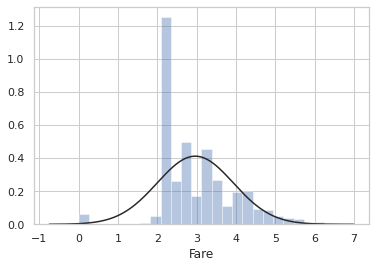

In [ ]:
ax = sns.distplot(np.log(train_data['Fare']+1), fit=norm, kde=False)

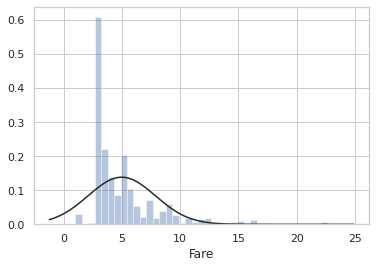

In [ ]:
ax = sns.distplot((train_data['Fare']+1)**(1/2), fit=norm, kde=False)

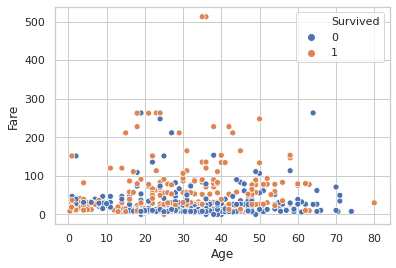

In [ ]:
sns.scatterplot(x='Age',y='Fare',data=train_data,hue='Survived')

In [ ]:
exp1 = pd.DataFrame()

In [ ]:
exp1['Fare'] =(train_data['Fare'])
exp1['Age'] = (train_data['Age'])
exp1['Fare_sqrt'] =(train_data['Fare']+1)**(1/2)
exp1['Age_sqrt'] = (train_data['Age']+1)**(1/2)
exp1['Fare_exp'] =(train_data['Fare']+1)**(1/5)
exp1['Age_exp'] = (train_data['Age']+1)**(1/5)
exp1['Fare_lg'] =np.log(train_data['Fare']+1)
exp1['Age_lg'] = np.log(train_data['Age']+1)
exp1['Survived'] =train_data['Survived']

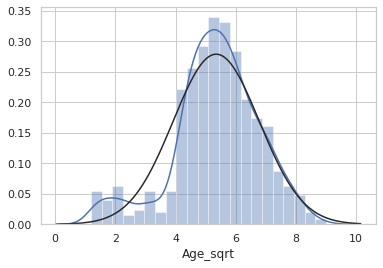

In [ ]:
ax = sns.distplot(exp1['Age_sqrt'], fit=norm, kde=True)

In [ ]:
for i in exp1:
  if i != 'Survived':
    exp1[i] = exp1[i].fillna(exp1[i].mean())

In [ ]:
exp1.loc[ exp1['Age_sqrt'] <= 4, 'Age_sqrt'] = 1
exp1.loc[(exp1['Age_sqrt'] > 4) & (exp1['Age_sqrt'] <= 8), 'Age_sqrt'] = 2
#exp1.loc[(exp1['Age_sqrt'] > 5) & (exp1['Age_sqrt'] <= 6.5), 'Age_sqrt'] = 3
#exp1.loc[(exp1['Age_sqrt'] > 6.5) & (exp1['Age_sqrt'] <= 7.5), 'Age_sqrt'] = 4
exp1.loc[ exp1['Age_sqrt'] > 8, 'Age_sqrt'] = 3

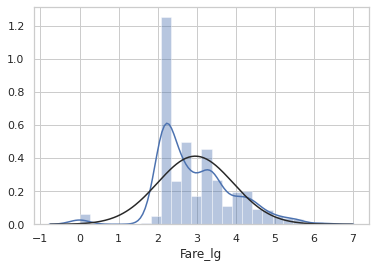

In [ ]:
ax = sns.distplot(exp1['Fare_lg'], fit=norm, kde=True)

In [ ]:
exp1.loc[ exp1['Fare_lg'] <= 2.5, 'Fare_lg'] = 1
exp1.loc[(exp1['Fare_lg'] > 2.5) & (exp1['Fare_lg'] <= 5), 'Fare_lg'] = 2
#exp1.loc[(exp1['Age_sqrt'] > 5) & (exp1['Age_sqrt'] <= 6.5), 'Age_sqrt'] = 3
#exp1.loc[(exp1['Age_sqrt'] > 6.5) & (exp1['Age_sqrt'] <= 7.5), 'Age_sqrt'] = 4
exp1.loc[ exp1['Fare_lg'] > 5, 'Fare_lg'] = 3

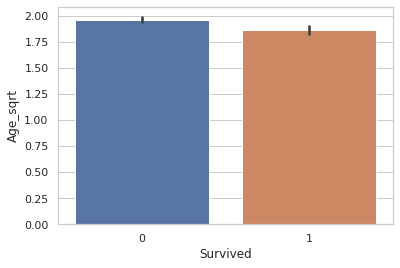

In [ ]:
ax = sns.barplot(x="Survived", y="Age_sqrt", data=exp1)

In [ ]:
exp1.describe()

Fare         Age   Fare_sqrt  ...     Fare_lg      Age_lg    Survived
count  891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    32.204208   29.699118    4.989419  ...    1.620651    3.258874    0.383838
std     49.693429   13.002015    2.884309  ...    0.548522    0.612256    0.486592
min      0.000000    0.420000    1.000000  ...    1.000000    0.350657    0.000000
25%      7.910400   22.000000    2.985028  ...    1.000000    3.135494    0.000000
50%     14.454200   29.699118    3.931183  ...    2.000000    3.258874    0.000000
75%     31.000000   35.000000    5.656854  ...    2.000000    3.583519    1.000000
max    512.329200   80.000000   22.656769  ...    3.000000    4.394449    1.000000

[8 rows x 9 columns]

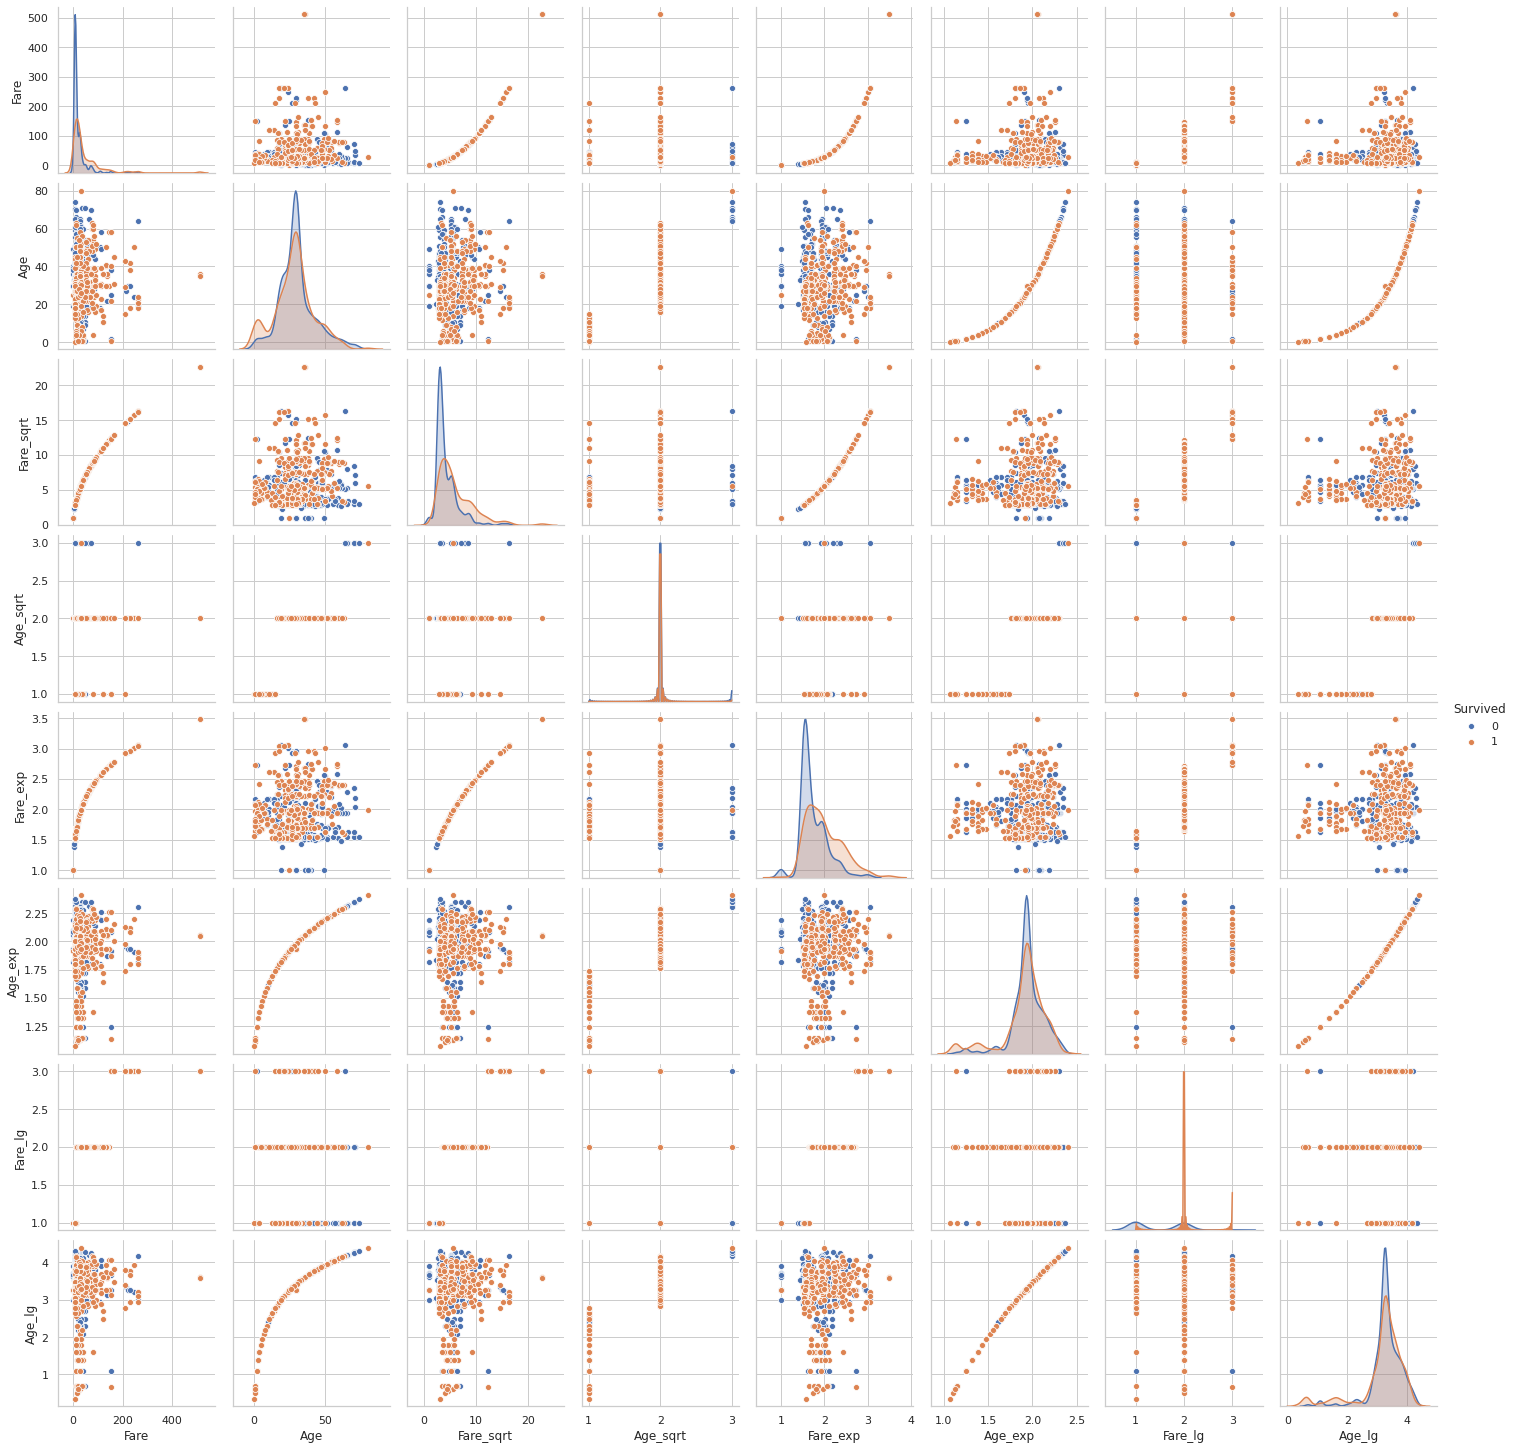

In [ ]:
sns.pairplot(exp1,hue='Survived')

In [ ]:
temp_train = train_data.copy()
temp_test = test_data.copy()

In [ ]:
train_data = temp_train.copy()
test_data = temp_test.copy()

In [ ]:
tr = temp_train.copy()
te = temp_test.copy()

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
tr['Age'] = tr[['Age','Pclass']].apply(impute_age,axis=1)
te['Age'] = te[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
tr['Embarked'] = tr['Embarked'].fillna(tr['Embarked'].mode()[0])
te['Fare'] = te['Fare'].fillna(te['Fare'].mean())

In [ ]:
#train_data.isnull().sum()
#train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
#train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [ ]:
#test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
#test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
#test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [ ]:
emb = pd.get_dummies(tr['Embarked'], drop_first = True)
sex = pd.get_dummies(tr['Sex'], drop_first = True)
tr = pd.concat([tr, sex, emb], axis = 1)

emb = pd.get_dummies(te['Embarked'], drop_first = True)
sex = pd.get_dummies(te['Sex'], drop_first = True)
te = pd.concat([te, sex, emb], axis = 1)

tr.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
te.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [ ]:
genders = {"male": 0, "female": 1}
embarked = {"C": 0, "Q": 1, "S": 2}
data = [tr, te]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [ ]:
tr.head(5)

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

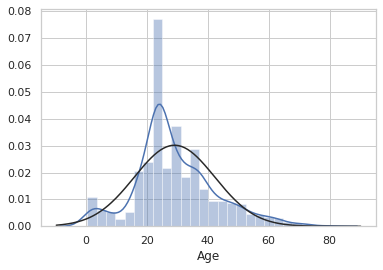

In [ ]:
ax = sns.distplot(tr['Age'], fit=norm, kde=True)

In [ ]:
khamakha

In [ ]:
'''
tr.loc[tr['Age'] <= 15, 'Age'] = 1
tr.loc[(tr['Age'] > 15) & (tr['Age'] <= 40), 'Age'] = 2
tr.loc[(tr['Age'] > 40) & (tr['Age'] <= 50), 'Age'] = 3
tr.loc[tr['Age'] > 50, 'Age'] = 4

te.loc[te['Age'] <= 15, 'Age'] = 1
te.loc[(te['Age'] > 15) & (te['Age'] <= 40), 'Age'] = 2
te.loc[(te['Age'] > 40) & (te['Age'] <= 50), 'Age'] = 3
te.loc[te['Age'] > 50, 'Age'] = 4
'''

In [ ]:
tr.loc[tr['Age'] <= 20, 'Age'] = 1
tr.loc[(tr['Age'] > 20) & (tr['Age'] <= 40), 'Age'] = 2
tr.loc[tr['Age'] > 40, 'Age'] = 3

te.loc[te['Age'] <= 20, 'Age'] = 1
te.loc[(te['Age'] > 20) & (te['Age'] <= 40), 'Age'] = 2
te.loc[te['Age'] > 40, 'Age'] = 3

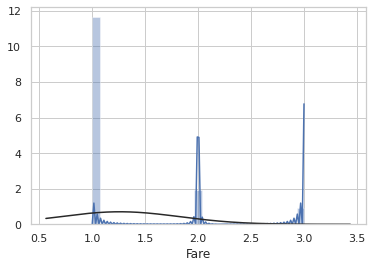

In [ ]:
ax = sns.distplot(tr['Fare'], fit=norm, kde=True)

In [ ]:
'''
tr.loc[tr['Fare'] <= 40, 'Fare'] = 1
tr.loc[(tr['Fare'] > 40) & (tr['Fare'] <= 90), 'Fare'] = 2
tr.loc[tr['Fare'] > 90, 'Fare'] = 3

te.loc[te['Fare'] <= 40, 'Fare'] = 1
te.loc[(te['Fare'] > 40) & (te['Fare'] <= 90), 'Fare'] = 2
te.loc[te['Fare'] > 90, 'Fare'] = 3
'''

In [ ]:
tr.loc[tr['Fare'] <= 50, 'Fare'] = 1
tr.loc[tr['Fare'] > 50, 'Fare'] = 2

te.loc[te['Fare'] <= 50, 'Fare'] = 1
te.loc[te['Fare'] > 50, 'Fare'] = 2

In [ ]:
tr['Age'] = (tr['Age'])**(1/2)
te['Age'] = (te['Age'])**(1/2)
tr['Fare'] = (tr['Fare'])**(1/2)
tr['Fare'] = (tr['Fare'])**(1/2)

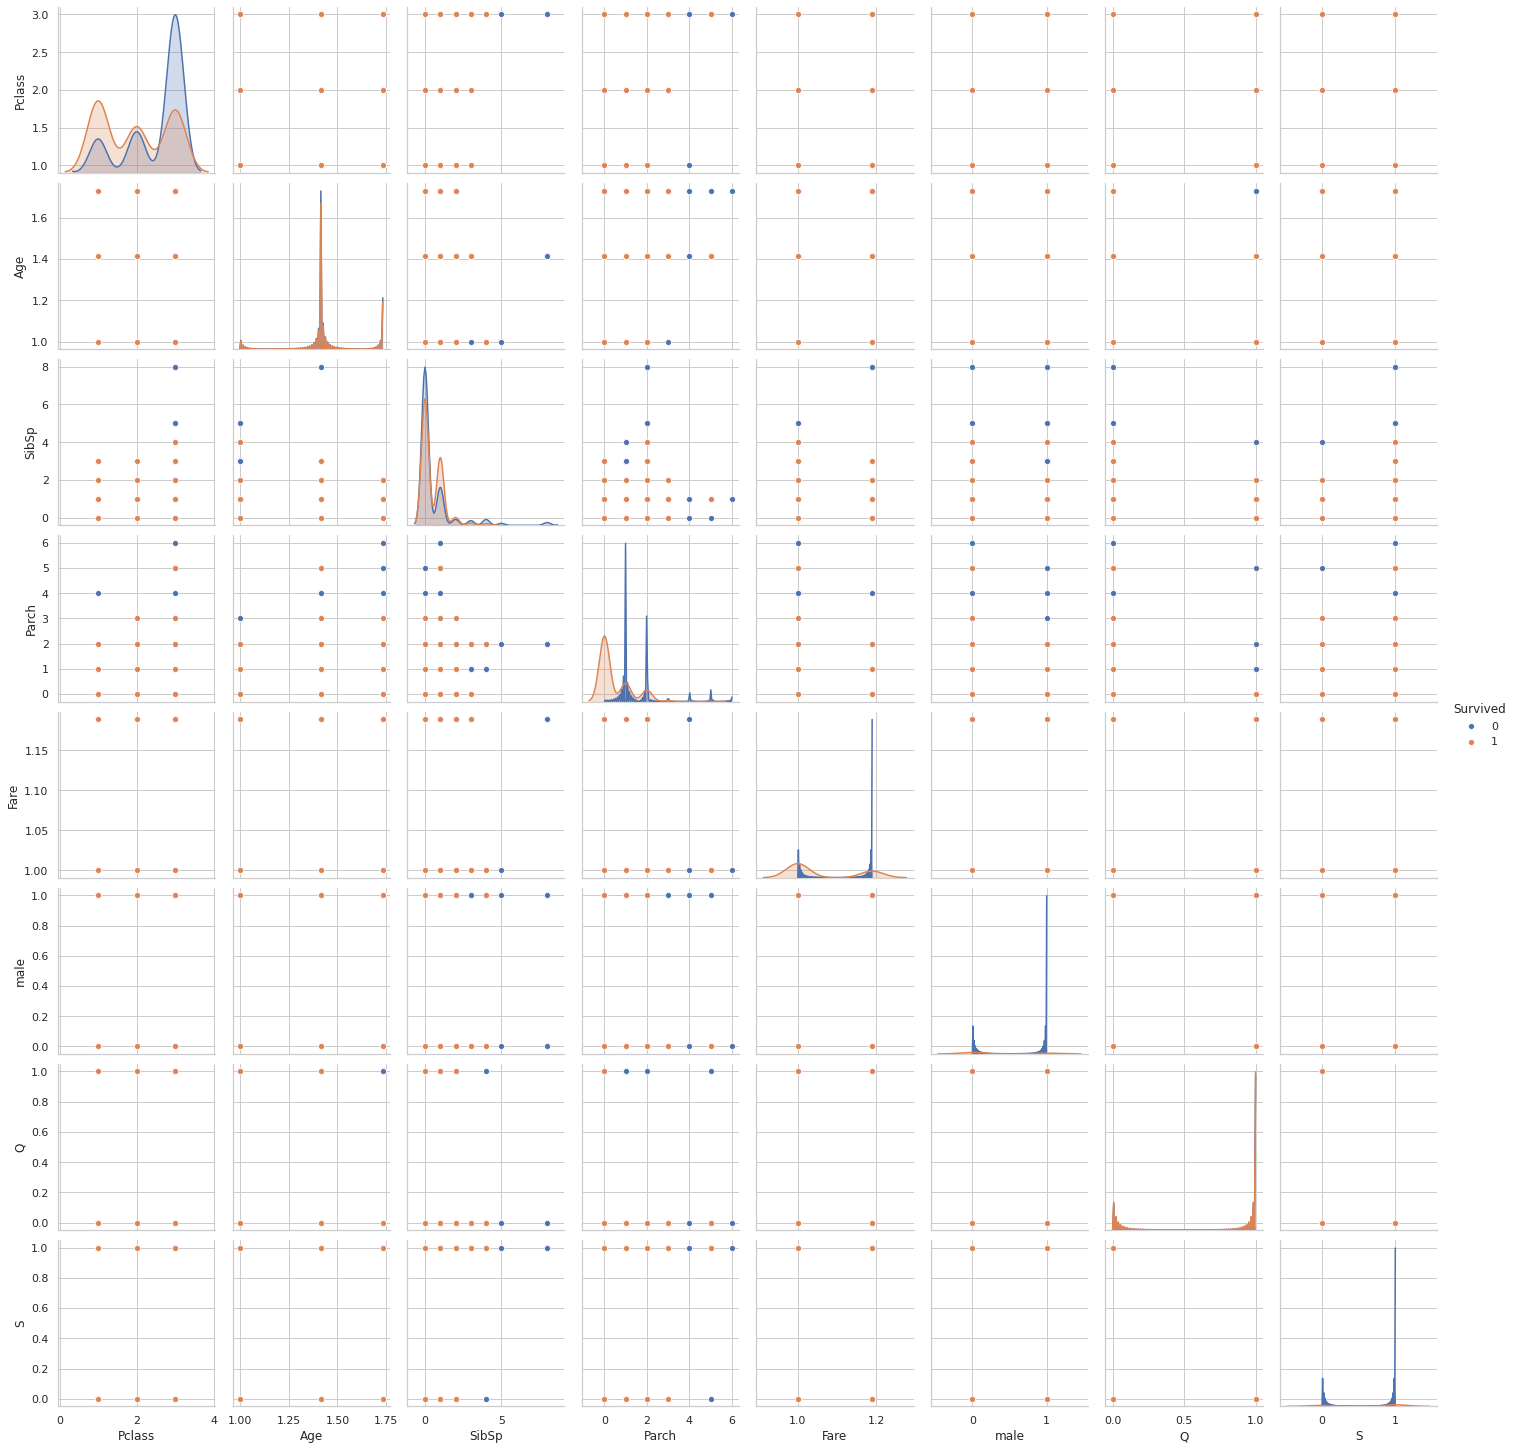

In [ ]:
sns.pairplot(tr,hue='Survived')

In [ ]:
train = tr.drop(['Survived'],axis = 1)
y = tr['Survived']

In [ ]:
y_train = y

In [ ]:
x = train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(x)

In [ ]:
x = te.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(x)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=101)

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
clf = SVC(kernel="poly", C=0.8,degree=10, probability=True)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
acc_poly_svc = round(clf.score(X_train, y_train) * 100, 2)
acc_poly_svc

85.07

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines','Support Vector Machines Poly', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc,acc_poly_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                              
86.08                 Random Forest
86.08                 Decision Tree
85.07  Support Vector Machines Poly
83.84                           KNN
80.47       Support Vector Machines
80.13           Logistic Regression
78.79    Stochastic Gradient Decent
78.11                   Naive Bayes
67.68                    Perceptron

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
#rf = SVC(kernel="poly", C=0.8,degree=10, probability=True)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.78651685 0.75280899 0.84269663 0.83146067 0.79775281
 0.82022472 0.78651685 0.78651685 0.85393258]
Mean: 0.80250936329588
Standard Deviation: 0.03155330130983468


In [ ]:
importances = pd.DataFrame({'feature':train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

importance
feature            
male          0.420
Pclass        0.158
SibSp         0.114
Parch         0.098
Age           0.080
Fare          0.067
S             0.042
Q             0.021

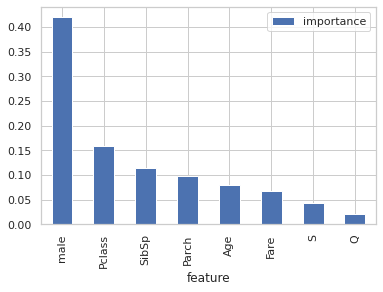

In [ ]:
importances.plot.bar()

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

86.08 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.02 %


In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.47 %


In [ ]:
y1 = np.asarray(test_dataY['Survived'])

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
acc = accuracy_score(y1, Y_prediction)
acc

0.8803827751196173

In [ ]:
pred_y = Y_prediction.reshape(-1)
all_id = np.array(test_dataY['PassengerId'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['PassengerId', 'Survived'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/new.csv", index=False)